In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
def correl_plot(x, y, xlabel, ylabel, title=None, add_trend=True,
                should_plot=False, savepath=None):
    plt.clf()
    fig, ax = plt.subplots()
    
    if add_trend:
        z = np.poly1d(np.polyfit(x=x, y=y, deg=1))
        bf = z(np.unique(x))
        err_std = np.std(y-z(x))
        ax.plot(np.unique(x), bf, label='best fit ($\mu \pm \sigma$)', c='orange')
        ax.fill_between(np.unique(x), bf-err_std, bf+err_std, color='orange',
                        alpha=0.2)
        
    ax.scatter(x, y, c='blue', alpha=0.8, s=6)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    if title:
        ax.set_title(title)
        
    ax.legend()
    
    plt.tight_layout()
    
    if should_plot:
        plt.show()
    if savepath:
        plt.savefig(savepath)

<Figure size 432x288 with 0 Axes>

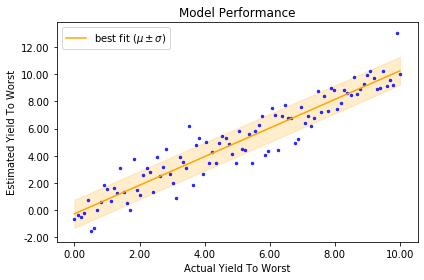

In [69]:
# mock data
N = 100
X = np.linspace(0, 10, N)
Y = X + np.random.normal(0, 1, N)
xlabel = 'Actual Yield To Worst'
ylabel = 'Estimated Yield To Worst'
title = 'Model Performance'
correl_plot(X, Y, xlabel, ylabel, title=title, should_plot=True)